In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logistic_map(r, x):
    # return r * x * (1 - x)  # original version.
    return 1 - r * x * x  # use the reformed version.

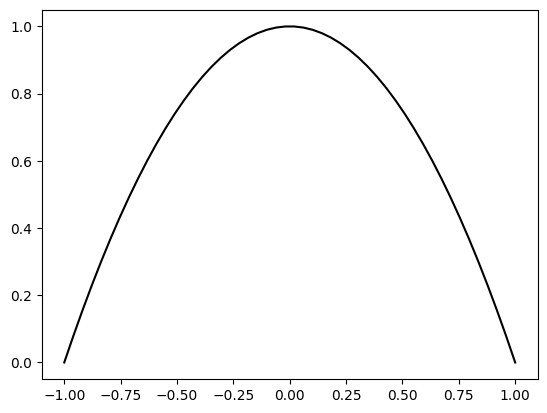

In [3]:
x = np.linspace(-1, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic_map(1., x), 'k')

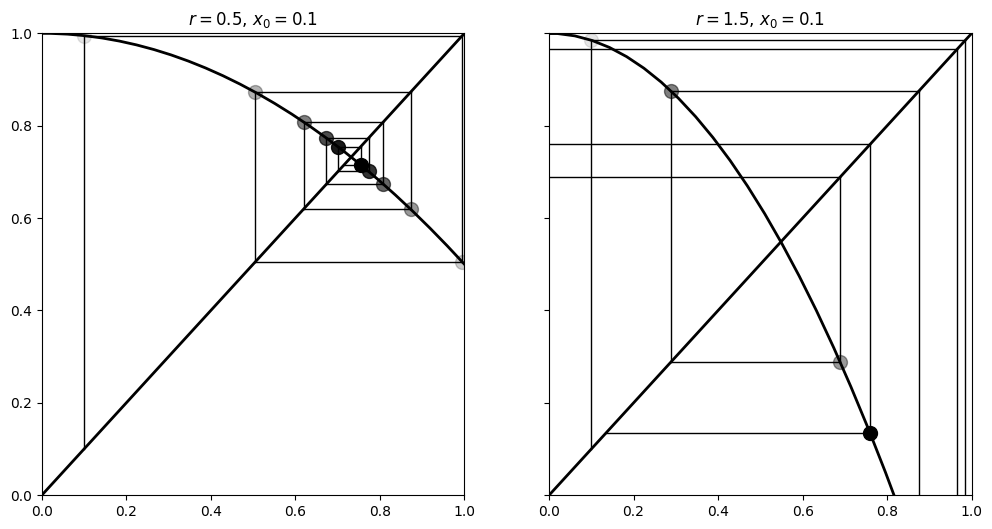

In [4]:
def plot_system(r, x0, n, ax):
    """Plot the function and the y=x diagonal line."""
    t = np.linspace(-1, 1)
    ax.plot(t, logistic_map(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic_map(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(0.5, .1, 10, ax1)
plot_system(1.5, .1, 10, ax2)

In [5]:
# CRITICAL_R = 3.569945669  # The critical value for the original version of logistic map.
CRITICAL_R = 1.4010601
MIN_R, MAX_R = 0, 2

/run/user/1000/ipykernel_73393/4068101675.py:13: RuntimeWarning: divide by zero encountered in log
  lyapunov += np.log(abs(gradient))


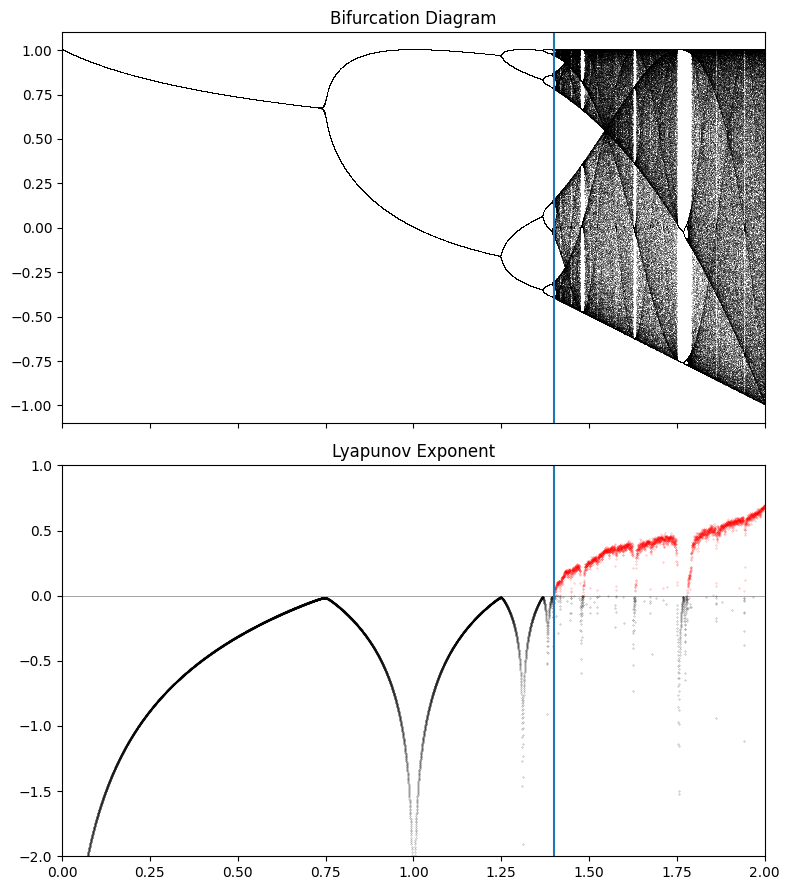

In [6]:
def plot_bifurcation(n, iterations, last):
    """Plots bifurcation diagram and the corresponding Lyapunov spectrum."""
    lyapunov = np.zeros(n)
    r = np.linspace(MIN_R, MAX_R, n)
    x = np.zeros(n)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                                   sharex=True)
    for i in range(iterations):
        x = logistic_map(r, x)
        # We compute the partial sum of the
        # Lyapunov exponent.
        gradient = 2 * r * x
        lyapunov += np.log(abs(gradient))
        # We display the bifurcation diagram.
        if i >= (iterations - last):
            ax1.plot(r, x, ',k', alpha=.25)
    ax1.set_xlim(MIN_R, MAX_R)
    ax1.axvline(CRITICAL_R)
    ax1.set_title("Bifurcation Diagram")
    
    # We display the Lyapunov exponent.
    # Horizontal line.
    ax2.axhline(0, color='k', lw=.5, alpha=.5)
    # Negative Lyapunov exponent.
    ax2.plot(r[lyapunov < 0],
             lyapunov[lyapunov < 0] / iterations,
             '.k', alpha=.5, ms=.5)
    # Positive Lyapunov exponent.
    ax2.plot(r[lyapunov >= 0],
             lyapunov[lyapunov >= 0] / iterations,
             '.r', alpha=.5, ms=.5)
    ax2.axvline(CRITICAL_R)
    ax2.set_xlim(MIN_R, MAX_R)
    ax2.set_ylim(-2, 1)
    ax2.set_title("Lyapunov Exponent")
    plt.tight_layout()

plot_bifurcation(10000, 400, 100)

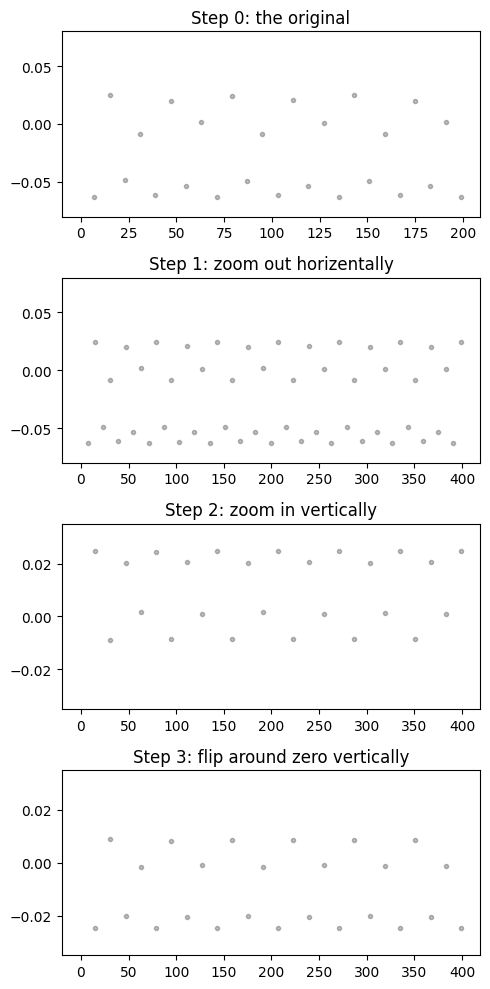

In [7]:
def plot_self_similarity(iterations, r=CRITICAL_R):
    """Plots the steps that furnishes self-similarity."""
    x = 0.
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(5, 10))
    for i in range(iterations):
        x = logistic_map(r, x)
        if i < iterations / 2:
            ax0.plot(i, x, 'k.', alpha=0.25)
        ax1.plot(i, x, 'k.', alpha=0.25)
        ax2.plot(i, x, 'k.', alpha=0.25)
        ax3.plot(i, -x, 'k.', alpha=0.25)

    ax0.set_ylim(-0.08, 0.08)
    ax0.set_title('Step 0: the original')

    ax1.set_ylim(-0.08, 0.08)
    ax1.set_title('Step 1: zoom out horizentally')
    
    ax2.set_ylim(-0.035, 0.035)
    ax2.set_title('Step 2: zoom in vertically')

    ax3.set_ylim(-0.035, 0.035)
    ax3.set_title('Step 3: flip around zero vertically')

    plt.tight_layout()

plot_self_similarity(400)

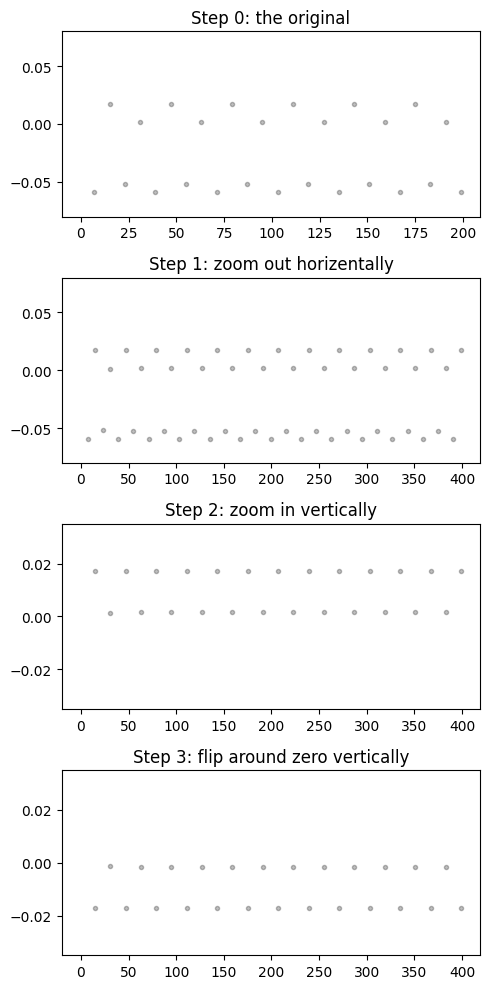

In [8]:
# Self-similarity holds only for the 
plot_self_similarity(400, r=CRITICAL_R-1e-3)